In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_data = pd.read_csv(r"C:\Users\rohan\Desktop\Deep Learning\Google_Stock_Price_Train.csv")
train_data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [3]:
training_set = dataset_train.iloc[:, 1:2].values #creates a numpy array training_set

In [4]:
training_set.dtype

dtype('float64')

In [5]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# SCALING

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

# Creating Data Structure with 60 timesteps (3 months) and 1 output

In [8]:
X_train = [] #Initialization with an empty list
Y_train = [] #Initialization with an empty list
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append(training_set_scaled[i,0])
# Turning lists into Numpy arrays
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [9]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [10]:
X_train.shape

(1198, 60)

# Reshaping

In [11]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

# Building the RNN architecture

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [14]:
regressor = Sequential()
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.25))
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.25))
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.25))
regressor.add(LSTM(units = 64, return_sequences = False))
regressor.add(Dropout(0.25))
regressor.add(Dense(units= 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

C:\Users\rohan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Training the RNN model

In [15]:
regressor.fit(X_train,Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0933
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0082
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0059
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0060
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0052
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0048
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0047
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0047
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0056
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0047
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0043
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0038
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0039
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0048
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - lo

# Testing the RNN model

In [16]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [18]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [19]:
from keras.models import load_model
regressor.save('RNN_model_trained.h5')

In [20]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


array([[772.9857 ],
       [770.5543 ],
       [770.1461 ],
       [770.9169 ],
       [773.62585],
       [778.8302 ],
       [784.32574],
       [787.6193 ],
       [788.97076],
       [789.11774],
       [788.70166],
       [788.0389 ],
       [787.4352 ],
       [787.5006 ],
       [788.1535 ],
       [791.84845],
       [797.9958 ],
       [805.30505],
       [810.4537 ],
       [808.8984 ]], dtype=float32)

# Visualization of results

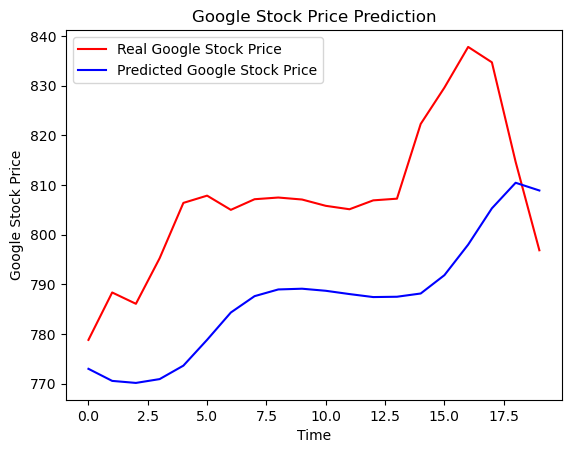

In [21]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# GRU model

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_gru_model(input_shape):
    model = models.Sequential([
        layers.GRU(64, return_sequences=True, input_shape=input_shape),
        layers.GRU(32, return_sequences=False),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Assuming binary classification
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',  # Adjust as per your task
        metrics=['accuracy']
    )
    return model

# Example: Assuming your input shape is (time_steps, features)
input_shape = (100, 10)  # Replace with your actual input shape
gru_model = create_gru_model(input_shape)
gru_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                          │ (None, 100, 64)             │          14,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,089 (98.00 KB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 0 (0.00 B)

# Initialising GRU and plotting 

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.0591
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0067
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0047
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0053
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0042
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0041
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0038
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0043
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0033
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0032
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0037
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0035
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0032
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0036
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - l

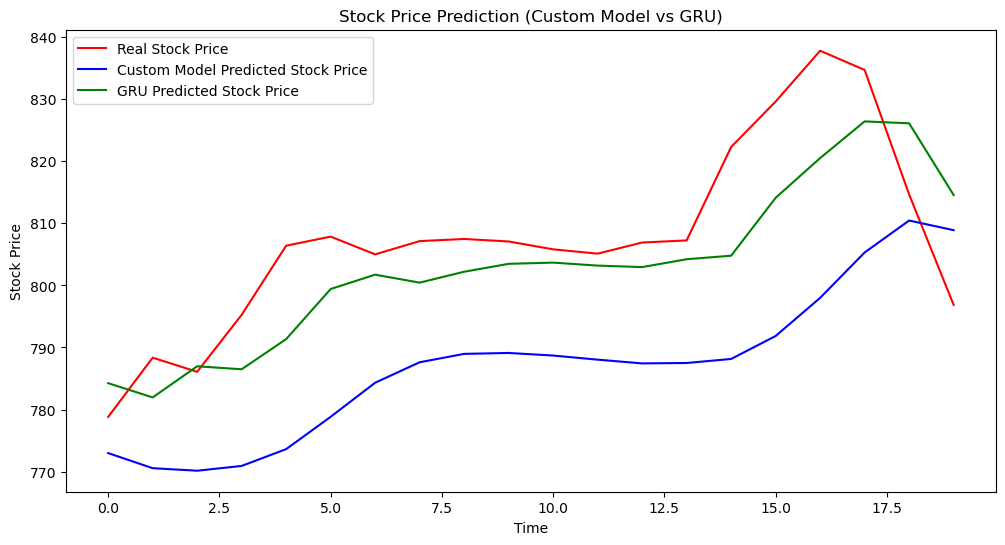

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import matplotlib.pyplot as plt

# Initialising the GRU Model
gru_model = Sequential()

# Adding the first GRU layer and some Dropout regularisation
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dropout(0.2))

# Adding a second GRU layer and some Dropout regularisation
gru_model.add(GRU(units=50, return_sequences=True))
gru_model.add(Dropout(0.2))

# Adding a third GRU layer and some Dropout regularisation
gru_model.add(GRU(units=50, return_sequences=True))
gru_model.add(Dropout(0.2))

# Adding a fourth GRU layer and some Dropout regularisation
gru_model.add(GRU(units=50))
gru_model.add(Dropout(0.2))

# Adding the output layer
gru_model.add(Dense(units=1))  # Assuming this is a regression task (stock price prediction)

# Compiling the GRU
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Training the GRU model
gru_model.fit(X_train, Y_train, epochs=100, batch_size=32)

# Predicting with the GRU model
gru_predicted_stock_price = gru_model.predict(X_test)

# Assuming `sc` is your MinMaxScaler used to scale data earlier
gru_predicted_stock_price = sc.inverse_transform(gru_predicted_stock_price)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(real_stock_price, color='red', label='Real Stock Price')  # Replace with actual variable
plt.plot(predicted_stock_price, color='blue', label='lstm Model Predicted Stock Price')
plt.plot(gru_predicted_stock_price, color='green', label='GRU Predicted Stock Price')
plt.title('Stock Price Prediction (lstm Model vs GRU)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# Initialising Vanilla RNN and PLotting 

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.6861
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.3498
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2658
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1877
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1617
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1327
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0992
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0762
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0693
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0600
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0452
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0492
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0441
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0421
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - lo

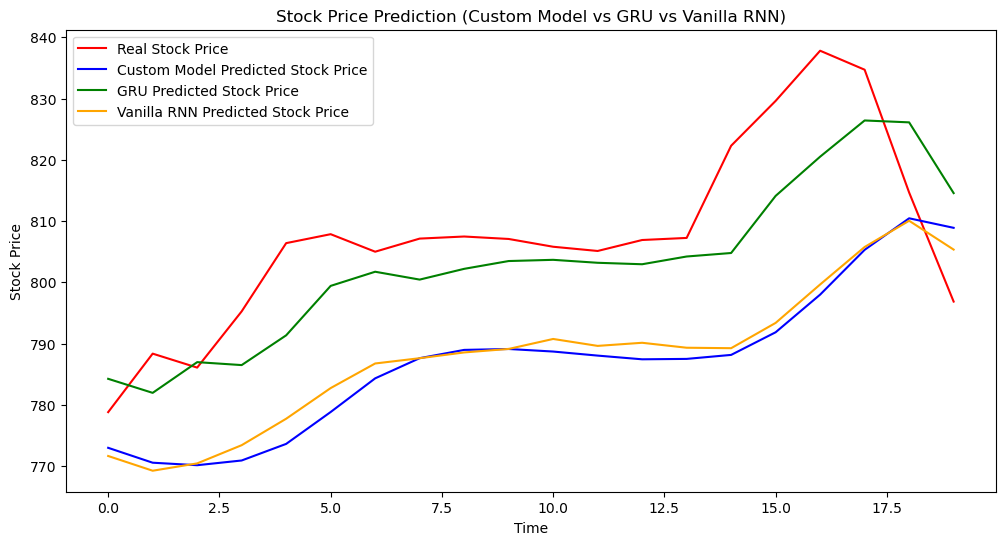

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

# Initialising the Vanilla RNN Model
rnn_model = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn_model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
rnn_model.add(SimpleRNN(units=50, return_sequences=True))
rnn_model.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
rnn_model.add(SimpleRNN(units=50, return_sequences=True))
rnn_model.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
rnn_model.add(SimpleRNN(units=50))
rnn_model.add(Dropout(0.2))

# Adding the output layer
rnn_model.add(Dense(units=1))  

# Compiling the RNN model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Training the RNN model
rnn_model.fit(X_train, Y_train, epochs=100, batch_size=32)

# Predicting with the Vanilla RNN model
rnn_predicted_stock_price = rnn_model.predict(X_test)

# Assuming `sc` is your MinMaxScaler used to scale data earlier
rnn_predicted_stock_price = sc.inverse_transform(rnn_predicted_stock_price)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(real_stock_price, color='red', label='Real Stock Price')  # Replace with actual variable
plt.plot(predicted_stock_price, color='blue', label='lstm Model Predicted Stock Price')
plt.plot(gru_predicted_stock_price, color='green', label='GRU Predicted Stock Price')
plt.plot(rnn_predicted_stock_price, color='orange', label='Vanilla RNN Predicted Stock Price')
plt.title('Stock Price Prediction (lstm Model vs GRU vs Vanilla RNN)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# Comparing and selecting the best model for stock price prediction

=== Metrics Comparison ===
lstm Model - MSE: 557.3455, MAE: 21.6586, RMSE: 23.6082
GRU Model     - MSE: 96.7596, MAE: 8.1328, RMSE: 9.8366
Vanilla RNN   - MSE: 492.4126, MAE: 20.3468, RMSE: 22.1904


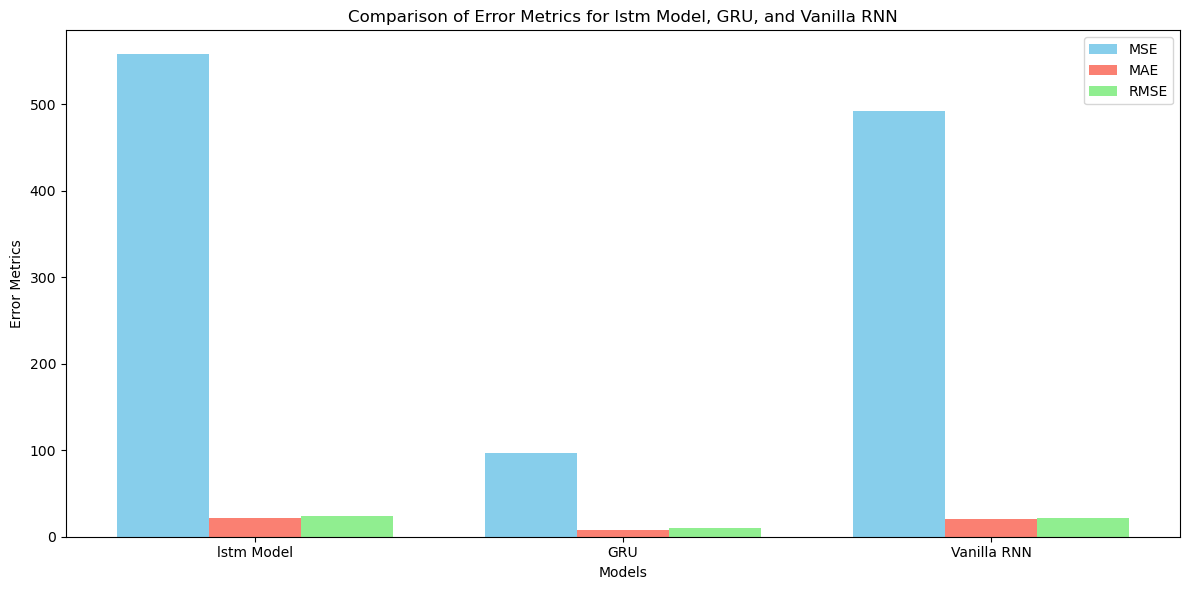

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Ensure the predicted values and real values are properly aligned
# Replace `real_stock_price`, `predicted_stock_price`, `gru_predicted_stock_price`, and `rnn_predicted_stock_price`
# with the actual variables storing these values

# Calculating metrics for the lstm Model
lstm_mse = mean_squared_error(real_stock_price, predicted_stock_price)
lstm_mae = mean_absolute_error(real_stock_price, predicted_stock_price)
lstm_rmse = np.sqrt(lstm_mse)

# Calculating metrics for the GRU Model
gru_mse = mean_squared_error(real_stock_price, gru_predicted_stock_price)
gru_mae = mean_absolute_error(real_stock_price, gru_predicted_stock_price)
gru_rmse = np.sqrt(gru_mse)

# Calculating metrics for the Vanilla RNN Model
rnn_mse = mean_squared_error(real_stock_price, rnn_predicted_stock_price)
rnn_mae = mean_absolute_error(real_stock_price, rnn_predicted_stock_price)
rnn_rmse = np.sqrt(rnn_mse)

# Printing the metrics
print("=== Metrics Comparison ===")
print(f"lstm Model - MSE: {lstm_mse:.4f}, MAE: {lstm_mae:.4f}, RMSE: {lstm_rmse:.4f}")
print(f"GRU Model     - MSE: {gru_mse:.4f}, MAE: {gru_mae:.4f}, RMSE: {gru_rmse:.4f}")
print(f"Vanilla RNN   - MSE: {rnn_mse:.4f}, MAE: {rnn_mae:.4f}, RMSE: {rnn_rmse:.4f}")

# Bar plot for metrics comparison
import matplotlib.pyplot as plt

models = ['lstm Model', 'GRU', 'Vanilla RNN']
mse_values = [lstm_mse, gru_mse, rnn_mse]
mae_values = [lstm_mae, gru_mae, rnn_mae]
rmse_values = [lstm_rmse, gru_rmse, rnn_rmse]

x = np.arange(len(models))  # label locations
width = 0.25  # bar width

# Create subplots
plt.figure(figsize=(12, 6))

# Bar plot for MSE
plt.bar(x - width, mse_values, width, label='MSE', color='skyblue')

# Bar plot for MAE
plt.bar(x, mae_values, width, label='MAE', color='salmon')

# Bar plot for RMSE
plt.bar(x + width, rmse_values, width, label='RMSE', color='lightgreen')

# Adding labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Error Metrics')
plt.title('Comparison of Error Metrics for lstm Model, GRU, and Vanilla RNN')
plt.xticks(x, models)
plt.legend()

# Display plot
plt.tight_layout()
plt.show()
